# Computing π by simulation

<img src="../img/cannon-circle.png" width="500">

Consider a cannon firing random shots on a square field enclosing a circle. If the radius of the circle is 1, then it's area is **π**, and the area of the field is **4**.

After **n** shots, the number **c** of shots inside the circle will be proportional to **π**:

$$
\frac{π}{4}=\frac{c}{n}
$$

Then the value of **π** can be computed like this:

$$
π = \frac{4 \cdot c}{n}
$$

To get started, let's generate coordinates for the shots:

In [1]:
import random

def rnd(n):
    return [random.uniform(-1, 1) for _ in range(n)]

SHOTS = 5000
x = rnd(SHOTS)
y = rnd(SHOTS)

Now we can select coordinate pairs inside the circle:

In [2]:
def pairs(seq1, seq2):
    yes1, yes2, no1, no2 = [], [], [], []
    for a, b in zip(seq1, seq2):
        if (a*a + b*b)**.5 <= 1:
            yes1.append(a)
            yes2.append(b)
        else:
            no1.append(a)
            no2.append(b)
    return yes1, yes2, no1, no2

x_sim, y_sim, x_nao, y_nao = pairs(x, y)

We now plot the shots inside the circle in blue, outside in red:

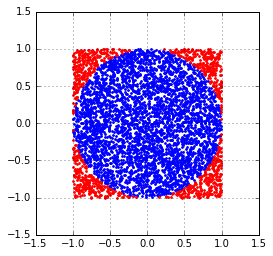

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.axes().set_aspect('equal')
plt.grid()
plt.scatter(x_sim, y_sim, 3, color='b')
plt.scatter(x_nao, y_nao, 3, color='r')

We can now see the **π** approximation:

$$
π = \frac{4 \cdot c}{n}
$$

In [4]:
4 * len(x_sim) / SHOTS

3.1368

The next function abstracts the process so far. Given `n`, `pi(n)` will compute an approximation of π by generating random coordinates and counting those that fall inside the circle:

In [5]:
def pi(n):
    uni = random.uniform
    c = 0
    i = 0
    while i < n:
        if abs(complex(uni(-1, 1), uni(-1, 1))) <= 1:
            c += 1
        i += 1
    return c * 4.0 / n

Using this loop, I tried the `pi()` function with `n` at different orders of magnitude:

```python
res = []
for i in range(10):
    n = 10**i
    res.append((n, pi(n)))

res
```

My notebook took more than 25 minutes to compute these results:

In [6]:
res = [
 (1, 4.0),
 (10, 2.8),
 (100, 3.24),
 (1000, 3.096),
 (10000, 3.1248),
 (100000, 3.14144),
 (1000000, 3.142716),
 (10000000, 3.1410784),
 (100000000, 3.14149756),
 (1000000000, 3.141589804)
]

Now we can graph how the results of `pi()` approach the actual **π** (the red line):

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

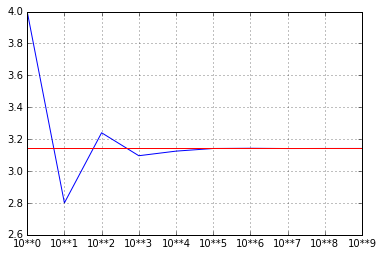

In [7]:
import math

plt.figure()
x, y = zip(*res)
x = [round(math.log(n, 10)) for n in x]
plt.plot(x, y)
plt.axhline(math.pi, color='r')
plt.grid()
plt.xticks(x, ['10**%1.0f' % a for a in x])
x